### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Question 1](#p1)

# [2. Question 2](#p2)

### [2a. European call option with sigma = 20](#p2a)

### [2b. European put option with sigma = 20](#p2b)

### [2c. European call option with sigma = 10](#p2c)

### [2d. European put option with sigma = 10](#p2d)

# [3. Question 3](#p3)

### [3a. European Options](#p3a)

[3aa. European Option Price](#p3aa)

[3ab. European Option Delta](#p3ab)

[3ac. European Option Gamma](#p3ac)

[3ad. European Option Vega](#p3ad)

[3ae. European Option Theta](#p3ae)

[3af. European Option Rho](#p3af)

### [3b. American Options](#p3b)

[3ba. European Option Price](#p3ba)

[3bb. European Option Delta](#p3bb)

[3bc. European Option Gamma](#p3bc)

[3bd. European Option Vega](#p3bd)

[3be. European Option Theta](#p3be)

[3bf. European Option Rho](#p3bf)

# <a id = "p1">1.</a>  <font color = "green"> Question 1 </font>  [back to table of contents](#top)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [1]:
def fromFixedPoint(w: int, 
                   b:int, 
                   bits:[int]) -> float:
    # w: width of the binary representation
    # b: binary point
    
    if w != len(bits):
        raise ValueError("Error: Width of the binary representation does not match the number of bits provided")
    
    if not all(bit in [0, 1] for bit in bits):
        raise ValueError("Error: Bits contain values other than 0 or 1")
    
    # Handle sign
    first_part = -bits[0] * (2 ** (w-1-b))

    second_part = 0
    for i in range(1, w):
        second_part += bits[i] * (2 ** (w-b-1-i))

    total = first_part + second_part
    
    return total

In [2]:
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

44.75

In [3]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

-13.28125

In [4]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-21.25

# <a id = "p2">2.</a>  <font color = "green"> Question 2 </font>  [back to table of contents](#top)

2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)? 

    Note: Don't use codes to generate numbers. Calcualte them manually.
    

## For (a) and (b)

Since it is a two step tree, t = T/2 = 0.5 

\begin{equation*}
b = e^{rt + \sigma^2 t} + e^{-rt} = e^{0.03 \cdot 0.5 + 0.2^2 \cdot 0.5} + e^{-0.03 \cdot 0.5} = 2.020731649
\end{equation*}

\begin{equation*}
u = \frac{b + \sqrt{b^2 - 4}}{2} = \frac{2.020731649 + \sqrt{2.020731649^2 - 4}}{2} = 1.154723363
\end{equation*}

\begin{equation*}
d = \frac{1}{u} = \frac{1}{1.154723363} = 0.866008285
\end{equation*}

\begin{equation*}
p = \frac{e^{rT} - d}{u - d} = \frac{e^{0.03 \cdot 0.5} - 0.866008285}{1.1547 - 0.866008285} = 0.516442646
\end{equation*}

\begin{equation*}
1 - p = 0.483557353
\end{equation*}

At $T=1/2$, 

$S_u = S \cdot u = 100 \cdot 1.154723363 = 115.4723363$ 

$S_d = S \cdot d = 100 \cdot 0.866008285 = 86.6008285$ 

At $T=1$, 

$S_{uu} = S_u \cdot u = 115.4723363 \cdot 1.154723363 = 133.3386045$ 

$S_{dd} = S_d \cdot d = 86.6008285 \cdot 0.866008285 = 74.99703497$ 

$S_{ud} = S_{du} = S_u \cdot d = 115.4723363 \cdot 0.866008285 = 100$ 

### <a id = "p2a">2a.</a>  <font color = "green"> Question 2a </font>  [back to table of contents](#top)

### European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$

At $uu$, payoff = max(133.3386045 - 105, 0) = 28.3386045

At $ud$, payoff = max(100 - 105, 0) = 0

At $dd$, payoff = max(74.99703497 - 105, 0) = 0

At $u$, payoff = $28.3386045 \times p \times e^{-0.03 \cdot 0.5} = 14.4173732$,

At $d$, payoff = $0$

At $T = 0$, payoff = $14.4173732 \times p \times e^{-0.03 \cdot 0.5} = 7.334893642$


### <a id = "p2b">2b.</a>  <font color = "green"> Question 2b </font>  [back to table of contents](#top)

### European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$

At $uu$, payoff = max(105 - 133.3386045, 0) = 0

At $ud$, payoff = max(105 - 100, 0) = 5

At $dd$, payoff = max(105 - 74.99703497, 0) = 30.00296503

At $u$, payoff = $ 5 \times (1-p) \times e^{-0.03 \cdot 0.5} = 2.38179061$,

At $d$, payoff = $ [5 \times p + 30.00296503 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 16.83592516$

At $T = 0$, payoff = $ [2.38179061 \times p + 16.83592516 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 9.231674753$

## For (c) and (d)

Since it is a two step tree, t = T/2 = 0.5 

\begin{equation*}
b = e^{rt + \sigma^2 t} + e^{-rt} = e^{0.03 \cdot 0.5 + 0.1^2 \cdot 0.5} + e^{-0.03 \cdot 0.5} = 2.00531328
\end{equation*}

\begin{equation*}
u = \frac{b + \sqrt{b^2 - 4}}{2} = \frac{2.00531328 + \sqrt{2.00531328^2 - 4}}{2} = 1.075597283
\end{equation*}

\begin{equation*}
d = \frac{1}{u} = \frac{1}{1.075597283} = 0.929715996
\end{equation*}

\begin{equation*}
p = \frac{e^{rT} - d}{u - d} = \frac{e^{0.03 \cdot 0.5} - 0.929715996}{1.075597283 - 0.929715996} = 0.585387404
\end{equation*}

\begin{equation*}
1 - p = 0.414612595
\end{equation*}

At $T=1/2$, 

$S_u = S \cdot u = 100 \cdot 1.075597283 = 107.5597283$ 

$S_d = S \cdot d = 100 \cdot 0.929715996 = 92.9715996$ 

At $T=1$, 

$S_{uu} = S_u \cdot u = 107.5597283 \cdot 1.075597283 = 115.6909515$ 

$S_{dd} = S_d \cdot d = 92.9715996 \cdot 0.929715996 = 86.43718332$ 

$S_{ud} = S_{du} = S_u \cdot d = 107.5597283 \cdot 0.929715996 = 100$ 

### <a id = "p2c">2c.</a>  <font color = "green"> Question 2c </font>  [back to table of contents](#top)

### European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$

At $uu$, payoff = max(115.6909515 - 105, 0) = 10.6909515 ,

At $ud$, payoff = max(100 - 105, 0) = 0 ,

At $dd$, payoff = max(86.43718332 - 105, 0) = 0

At $u$, payoff = $10.6909515 \times p \times e^{-0.03 \cdot 0.5} = 6.165173677$,

At $d$, payoff = $0$

At $T = 0$, payoff = $6.165173677 \times p \times e^{-0.03 \cdot 0.5} = 3.55528378$

### <a id = "p2d">2d.</a>  <font color = "green"> Question 2d </font>  [back to table of contents](#top)

### European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$

At $uu$, payoff = max(105 - 115.6909515, 0) = 0 ,

At $ud$, payoff = max(105 - 100, 0) = 5 ,

At $dd$, payoff = max(105 - 86.43718332, 0) = 18.56281668

At $u$, payoff = $ 5 \times (1-p) \times e^{-0.03 \cdot 0.5} = 2.042199088$,

At $d$, payoff = $ [5 \times p + 18.56281668 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 10.46515406$

At $T = 0$, payoff = $ [2.042199088 \times p + 10.46515406 \times (1-p)] \times e^{-0.03 \cdot 0.5} = 5.452064896$

### long (a) and short (b)
$7.334893642 - 9.231674753 = -1.89678111$

### long (c) and short (d)
$3.55528378 - 5.452064896 = -1.896781116$

# <a id = "p3">3.</a>  <font color = "green"> Question 3 </font>  [back to table of contents](#top)

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} , ~~~ choose ~~~ \Delta S ~~~ appropriately!\\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

  Please only show one graph for each Greek for European and American put option.  Total 12 graphs : (price, delta, gamma, vega, theta, rho) *(European, American Put Option).

In [5]:
# binomial pricer for exercise 3
import scipy as sc
from scipy.stats import norm
import numpy as np
import math
from enum import Enum
import matplotlib.pyplot as plt

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [6]:
class Greeks(Enum):
    Delta = 0
    Gamma = 1
    Vega = 2
    Theta = 3
    Rho = 4

In [7]:
class GreekType():
    def __init__(self, n, greeks, calib, trade):
        self.n = n
        self.greeks = greeks
        self.calib = calib
        self.trade = trade

In [8]:
def binomialGreeks(S, r, vol, T, strike, greekType):
    dS = 0.001*S
    dvol = 0.001*vol
    dt = 0.004
    dr = 0.0001
    
    VS = lambda S: binomialPricer(S, r, vol, greekType.trade, greekType.n, greekType.calib)
    
    Vvol = lambda vol: binomialPricer(S, r, vol, greekType.trade, greekType.n, greekType.calib)
    
    Vr = lambda r: binomialPricer(S, r, vol, greekType.trade, greekType.n, greekType.calib)
    
    
    if greekType.greeks == Greeks.Delta:
        calculated_Delta = \
            (
                (VS(S+dS) - VS(S-dS))
                /
                (2*dS)
            )
            
        return calculated_Delta
    
    elif greekType.greeks == Greeks.Gamma:
        Gamma_DS= 0.05*S
        calculated_Gamma = \
            (
                (VS(S+Gamma_DS) - 2*VS(S) + VS(S-Gamma_DS))
                /
                (Gamma_DS**2)
            )
            
        return calculated_Gamma
    
    elif greekType.greeks == Greeks.Vega:
        calculated_Vega = \
            (
                (Vvol(vol+dvol) - Vvol(vol-dvol))
                /
                (2*dvol)
            )
            
        return calculated_Vega
    
    elif greekType.greeks == Greeks.Theta:
        
        if isinstance(greekType.trade, EuropeanOption):
            calculated_Theta = (
                binomialPricer(S, r, vol, EuropeanOption((1-dt)*T, strike, greekType.trade.payoffType), greekType.n, greekType.calib) 
                - binomialPricer(S, r, vol, EuropeanOption(T, strike, greekType.trade.payoffType), greekType.n, greekType.calib)
            ) / dt
            
        elif isinstance(greekType.trade, AmericanOption):
            calculated_Theta = (
                binomialPricer(S, r, vol, AmericanOption((1-dt)*T, strike, greekType.trade.payoffType), greekType.n, greekType.calib) 
                - binomialPricer(S, r, vol, AmericanOption(T, strike, greekType.trade.payoffType), greekType.n, greekType.calib)
            ) / dt
            
        return calculated_Theta
        
    elif greekType.greeks == Greeks.Rho:
        calculated_Rho = \
            (
                (Vr(r+dr) - Vr(r-dr))
                /
                (2*dr)
            )
        return calculated_Rho

    else:
        raise Exception("greekType not supported: ", greekType.greeks)

In [9]:
def BlackScholesPut(S, K, r, q, sigma, T):
    
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)

In [10]:
def BS_put_greeks(S, K, r, q, sigma, T, greek):

    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if greek == "Delta":
        Delta_Put = -np.exp(-q*T) * norm.cdf(-d1)
        return Delta_Put
    
    elif greek == "Gamma":
        numerator = np.exp(-q*T) * norm.pdf(d1)
        denominator = S * sigma * np.sqrt(T)
        Gamma_Put = numerator / denominator
        return Gamma_Put
       
    elif greek == "Vega": 
        Vega_Put = S * np.exp(-q*T) * norm.pdf(d1) * np.sqrt(T)
        return Vega_Put
        
    elif greek == "Theta": 
        first_term = -S * np.exp(-q*T) * q * norm.cdf(-d1)
        second_term = K * np.exp(-r*T) * r * norm.cdf(-d2)
        third_term = S * np.exp(-q*T) * (sigma /(2*np.sqrt(T))) * norm.pdf(d1)
        Theta_Put = first_term + second_term - third_term
        return Theta_Put
        
    elif greek == "Rho":
        Rho_Put = - K * np.exp(-r*T) * T * norm.cdf(-d2)
        return Rho_Put
        

In [11]:
S = 100
r = 0.03
q = 0
vol = 0.2
T = 1

n = 300

ks = range(50, 150, 1)

### <a id = "p3a">3a.</a>  <font color = "green"> European Options </font>  [back to table of contents](#top)

<a id = "p3aa">3aa.</a>  <font color = "green"> European Options Price </font>  [back to table of contents](#top)

In [12]:
crrCall, crrPut = [], []
tianCall, tianPut = [], []
jrrnCall, jrrnPut = [], []
jreqCall, jreqPut = [], []
BSPut = []

for k in ks:
    crrCall.append(binomialPricer(S=S, 
                                  r=r, 
                                  vol=vol, 
                                  trade=EuropeanOption(T, k, PayoffType.Call), 
                                  n=n, 
                                  calib=crrCalib))
                   
    crrPut.append(binomialPricer(S, 
                                 r, 
                                 vol, 
                                 EuropeanOption(T, k, PayoffType.Put), 
                                 n, 
                                 crrCalib))  
    
    tianCall.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   EuropeanOption(T, k, PayoffType.Call), 
                                   n, 
                                   tianCalib))  
    
    tianPut.append(binomialPricer(S, 
                                  r, 
                                  vol, 
                                  EuropeanOption(T, k, PayoffType.Put), 
                                  n, 
                                  tianCalib))  
    
    jrrnCall.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   EuropeanOption(T, k, PayoffType.Call), 
                                   n, 
                                   jrrnCalib))  
    
    jrrnPut.append(binomialPricer(S, 
                                  r, 
                                  vol, 
                                  EuropeanOption(T, k, PayoffType.Put), 
                                  n, 
                                  jrrnCalib)) 
     
    jreqCall.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   EuropeanOption(T, k, PayoffType.Call), 
                                   n, 
                                   jreqCalib)) 
    
    jreqPut.append(binomialPricer(S, 
                                  r, 
                                  vol, 
                                  EuropeanOption(T, k, PayoffType.Put), 
                                  n, 
                                  jreqCalib)) 
    
    BSPut.append(BlackScholesPut(S, 
                                 k, 
                                 r, 
                                 q, 
                                 vol, 
                                 T))

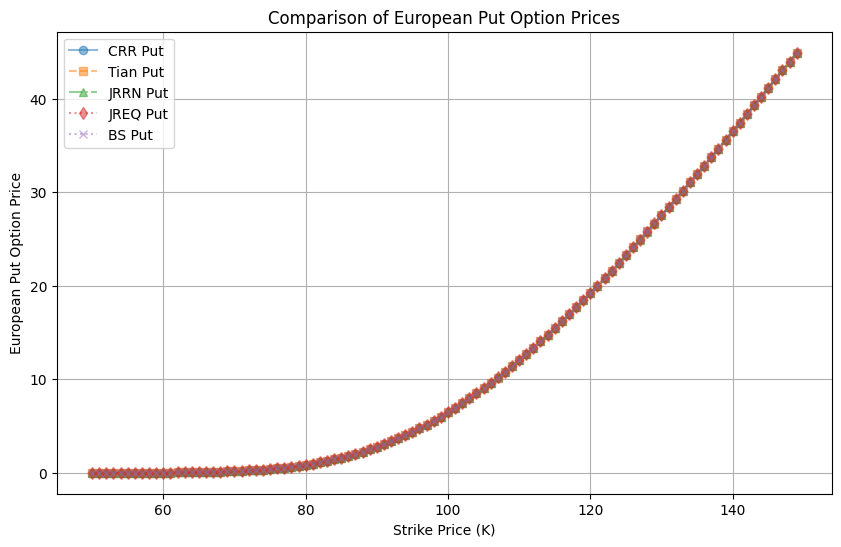

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrPut, label='CRR Put', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianPut, label='Tian Put', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnPut, label='JRRN Put', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqPut, label='JREQ Put', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSPut, label='BS Put', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Price')
plt.title('Comparison of European Put Option Prices')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3ab">3ab.</a>  <font color = "green"> European Options Delta </font>  [back to table of contents](#top)

In [14]:
crrDeltaCall, crrDeltaPut = [], []
tianDeltaCall, tianDeltaPut = [], []
jrrnDeltaCall, jrrnDeltaPut = [], []
jreqDeltaCall, jreqDeltaPut = [], []
BSDeltaPut = []

for k in ks:
    crrDeltaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Delta, crrCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    crrDeltaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Delta, crrCalib, EuropeanOption(T, k, PayoffType.Put))))   
     
    tianDeltaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, tianCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    tianDeltaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Delta, tianCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jrrnDeltaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, jrrnCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jrrnDeltaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol,
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Delta, jrrnCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jreqDeltaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, jreqCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jreqDeltaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Delta, jreqCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    BSDeltaPut.append(BS_put_greeks(S, k, r, q, vol, T, "Delta"))

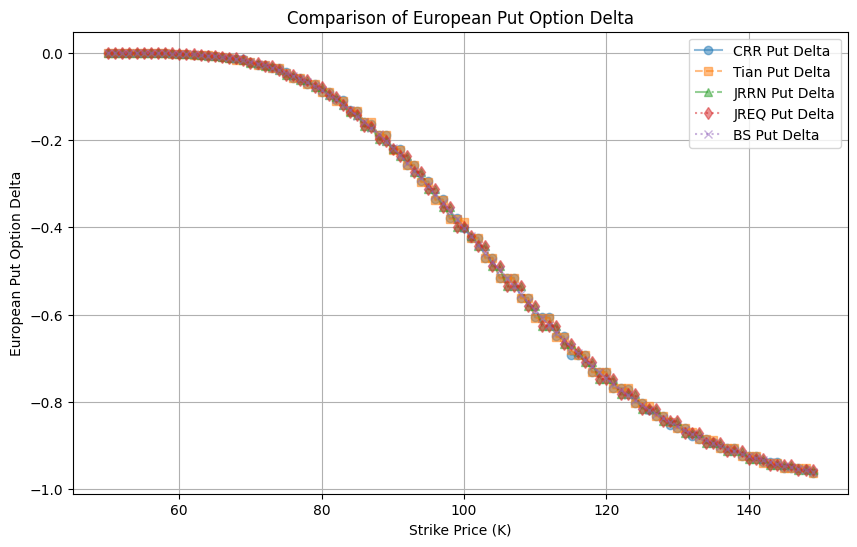

In [15]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrDeltaPut, label='CRR Put Delta', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianDeltaPut, label='Tian Put Delta', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnDeltaPut, label='JRRN Put Delta', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqDeltaPut, label='JREQ Put Delta', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSDeltaPut, label='BS Put Delta', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Delta')
plt.title('Comparison of European Put Option Delta')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3ac">3ac.</a>  <font color = "green"> European Options Gamma </font>  [back to table of contents](#top)

In [16]:
crrGammaCall, crrGammaPut = [], []
tianGammaCall, tianGammaPut = [], []
jrrnGammaCall, jrrnGammaPut = [], []
jreqGammaCall, jreqGammaPut = [], []
BSGammaPut = []

for k in ks:
    crrGammaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Gamma, crrCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    crrGammaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Gamma, crrCalib, EuropeanOption(T, k, PayoffType.Put))))    
    
    tianGammaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, tianCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    tianGammaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Gamma, tianCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jrrnGammaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, jrrnCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jrrnGammaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Gamma, jrrnCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jreqGammaCall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, jreqCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jreqGammaPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k,
                                       GreekType(n, Greeks.Gamma, jreqCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    BSGammaPut.append(BS_put_greeks(S, k, r, q, vol, T, "Gamma"))

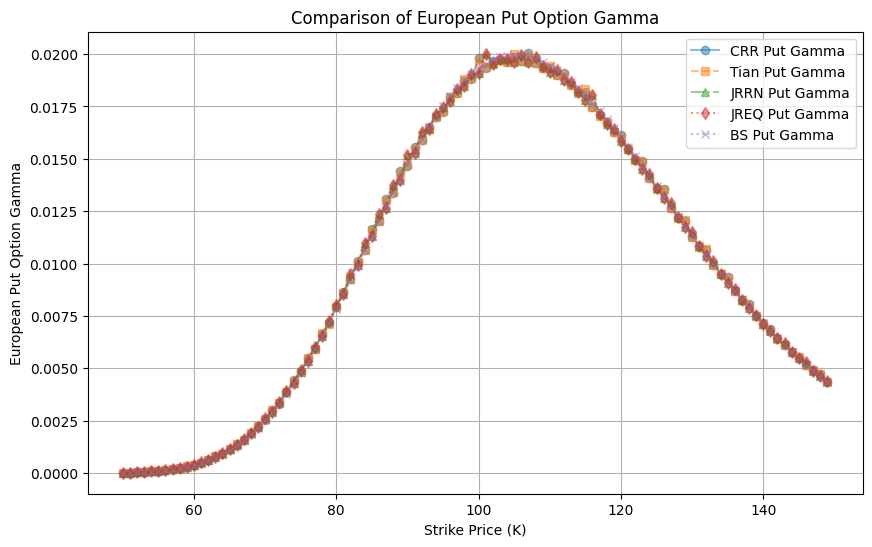

In [17]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrGammaPut, label='CRR Put Gamma', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianGammaPut, label='Tian Put Gamma', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnGammaPut, label='JRRN Put Gamma', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqGammaPut, label='JREQ Put Gamma', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSGammaPut, label='BS Put Gamma', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Gamma')
plt.title('Comparison of European Put Option Gamma')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3ad">3ad.</a>  <font color = "green"> European Options Vega </font>  [back to table of contents](#top)

In [18]:
crrVegaCall, crrVegaPut = [], []
tianVegaCall, tianVegaPut = [], []
jrrnVegaCall, jrrnVegaPut = [], []
jreqVegaCall, jreqVegaPut = [], []
BSVegaPut = []

for k in ks:
    crrVegaCall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Vega, crrCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    crrVegaPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Vega, crrCalib, EuropeanOption(T, k, PayoffType.Put))))  
      
    tianVegaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, tianCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    tianVegaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Vega, tianCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jrrnVegaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, jrrnCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jrrnVegaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Vega, jrrnCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jreqVegaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, jreqCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jreqVegaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Vega, jreqCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    BSVegaPut.append(BS_put_greeks(S, k, r, q, vol, T, "Vega"))

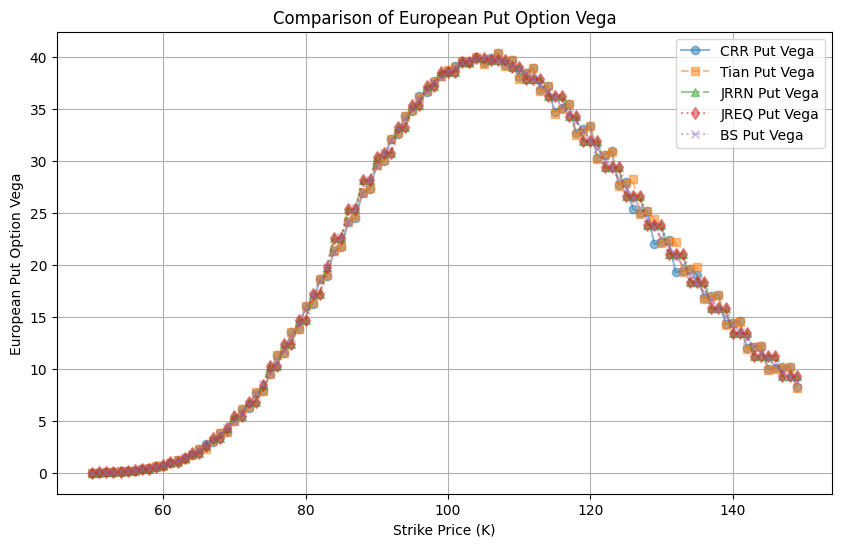

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrVegaPut, label='CRR Put Vega', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianVegaPut, label='Tian Put Vega', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnVegaPut, label='JRRN Put Vega', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqVegaPut, label='JREQ Put Vega', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSVegaPut, label='BS Put Vega', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Vega')
plt.title('Comparison of European Put Option Vega')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3ae">3ae.</a>  <font color = "green"> European Options Theta </font>  [back to table of contents](#top)

In [20]:
crrThetaCall, crrThetaPut = [], []
tianThetaCall, tianThetaPut = [], []
jrrnThetaCall, jrrnThetaPut = [], []
jreqThetaCall, jreqThetaPut = [], []
BSThetaPut = []

for k in ks:
    crrThetaCall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, crrCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    crrThetaPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Theta, crrCalib, EuropeanOption(T, k, PayoffType.Put))))  
      
    tianThetaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, tianCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    tianThetaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, tianCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jrrnThetaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, jrrnCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jrrnThetaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, jrrnCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jreqThetaCall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, jreqCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jreqThetaPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, jreqCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    BSThetaPut.append(BS_put_greeks(S, k, r, q, vol, T, "Theta"))

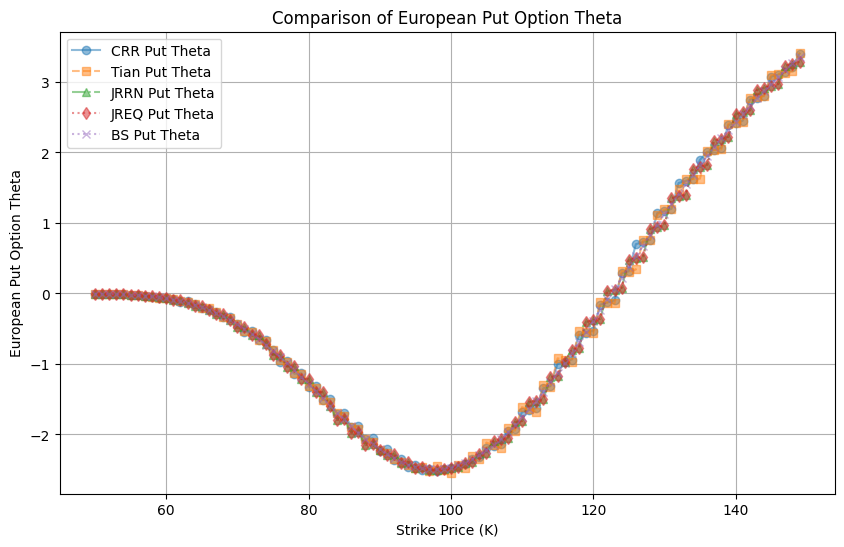

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrThetaPut, label='CRR Put Theta', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianThetaPut, label='Tian Put Theta', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnThetaPut, label='JRRN Put Theta', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqThetaPut, label='JREQ Put Theta', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSThetaPut, label='BS Put Theta', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Theta')
plt.title('Comparison of European Put Option Theta')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3af">3af.</a>  <font color = "green"> European Options Rho </font>  [back to table of contents](#top)

In [22]:
crrRhoCall, crrRhoPut = [], []
tianRhoCall, tianRhoPut = [], []
jrrnRhoCall, jrrnRhoPut = [], []
jreqRhoCall, jreqRhoPut = [], []
BSRhoPut = []

for k in ks:
    crrRhoCall.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Rho, crrCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    crrRhoPut.append(binomialGreeks(S, 
                                    r, 
                                    vol, 
                                    T, 
                                    k, 
                                    GreekType(n, Greeks.Rho, crrCalib, EuropeanOption(T, k, PayoffType.Put))))  
      
    tianRhoCall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, tianCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    tianRhoPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Rho, tianCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jrrnRhoCall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, jrrnCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jrrnRhoPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Rho, jrrnCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    jreqRhoCall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, jreqCalib, EuropeanOption(T, k, PayoffType.Call))))
    
    jreqRhoPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Rho, jreqCalib, EuropeanOption(T, k, PayoffType.Put))))
    
    BSRhoPut.append(BS_put_greeks(S, k, r, q, vol, T, "Rho"))

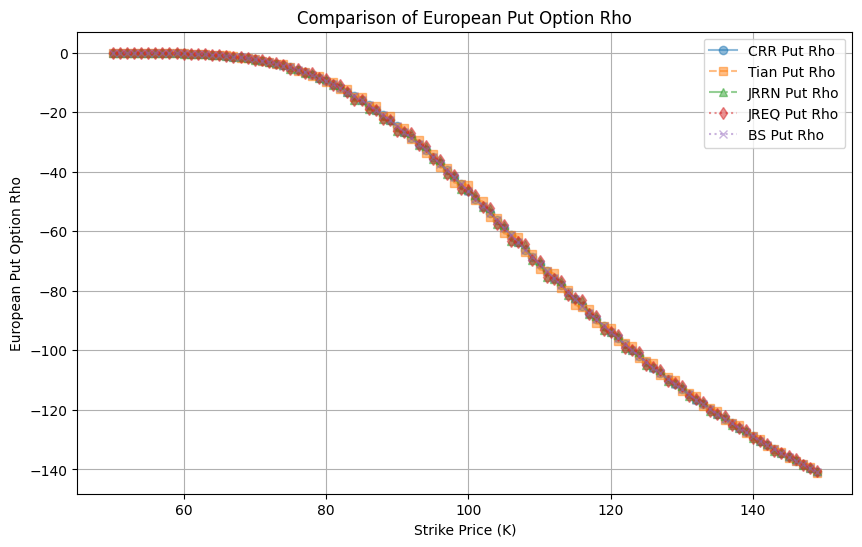

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrRhoPut, label='CRR Put Rho', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianRhoPut, label='Tian Put Rho', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnRhoPut, label='JRRN Put Rho', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqRhoPut, label='JREQ Put Rho', marker='d', linestyle=':', alpha=0.5)
plt.plot(ks, BSRhoPut, label='BS Put Rho', marker='x', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('European Put Option Rho')
plt.title('Comparison of European Put Option Rho')
plt.legend()
plt.grid(True)

plt.show()

### <a id = "p3b">3b.</a>  <font color = "green"> American Options </font>  [back to table of contents](#top)

<a id = "p3ba">3ba.</a>  <font color = "green"> American Options Price </font>  [back to table of contents](#top)

In [24]:
crrACall, crrAPut = [], []
tianACall, tianAPut = [], []
jrrnACall, jrrnAPut = [], []
jreqACall, jreqAPut = [], []

for k in ks:
    crrACall.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   AmericanOption(T, k, PayoffType.Call), 
                                   n, 
                                   crrCalib))
                   
    crrAPut.append(binomialPricer(S, 
                                  r, 
                                  vol, 
                                  AmericanOption(T, k, PayoffType.Put), 
                                  n, 
                                  crrCalib))  
    
    tianACall.append(binomialPricer(S, 
                                    r, 
                                    vol, 
                                    AmericanOption(T, k, PayoffType.Call), 
                                    n, 
                                    tianCalib))  
    
    tianAPut.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   AmericanOption(T, k, PayoffType.Put), 
                                   n, 
                                   tianCalib))  
    
    jrrnACall.append(binomialPricer(S, 
                                    r, 
                                    vol, 
                                    AmericanOption(T, k, PayoffType.Call), 
                                    n, 
                                    jrrnCalib))  
    
    jrrnAPut.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   AmericanOption(T, k, PayoffType.Put), 
                                   n, 
                                   jrrnCalib)) 
     
    jreqACall.append(binomialPricer(S, 
                                    r, 
                                    vol, 
                                    AmericanOption(T, k, PayoffType.Call), 
                                    n, 
                                    jreqCalib)) 
    
    jreqAPut.append(binomialPricer(S, 
                                   r, 
                                   vol, 
                                   AmericanOption(T, k, PayoffType.Put), 
                                   n, 
                                   jreqCalib)) 

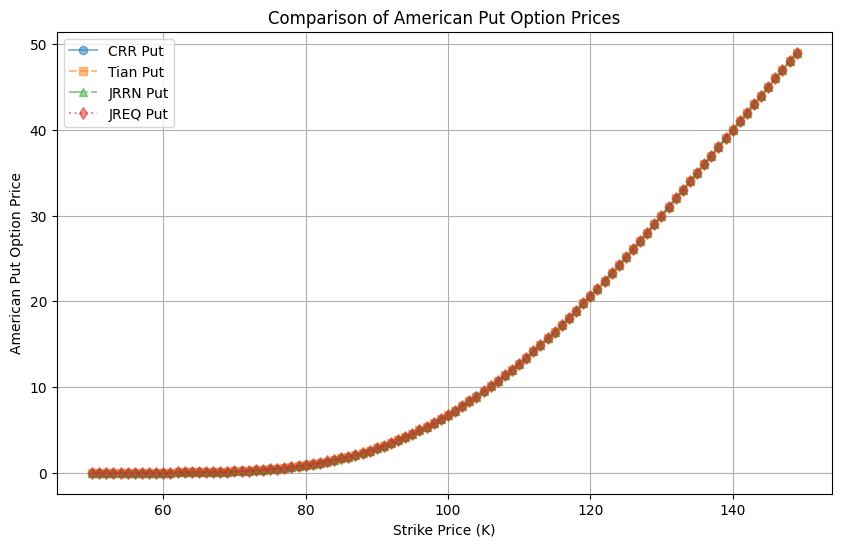

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrAPut, label='CRR Put', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianAPut, label='Tian Put', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnAPut, label='JRRN Put', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqAPut, label='JREQ Put', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Price')
plt.title('Comparison of American Put Option Prices')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3bb">3bb.</a>  <font color = "green"> American Options Delta </font>  [back to table of contents](#top)

In [26]:
crrDeltaACall, crrDeltaAPut = [], []
tianDeltaACall, tianDeltaAPut = [], []
jrrnDeltaACall, jrrnDeltaAPut = [], []
jreqDeltaACall, jreqDeltaAPut = [], []

for k in ks:
    crrDeltaACall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, crrCalib, AmericanOption(T, k, PayoffType.Call))))
    
    crrDeltaAPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Delta, crrCalib, AmericanOption(T, k, PayoffType.Put))))    
    
    tianDeltaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Delta, tianCalib, AmericanOption(T, k, PayoffType.Call))))
    
    tianDeltaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T,
                                        k, 
                                        GreekType(n, Greeks.Delta, tianCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jrrnDeltaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Delta, jrrnCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jrrnDeltaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, jrrnCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jreqDeltaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Delta, jreqCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jreqDeltaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Delta, jreqCalib, AmericanOption(T, k, PayoffType.Put))))

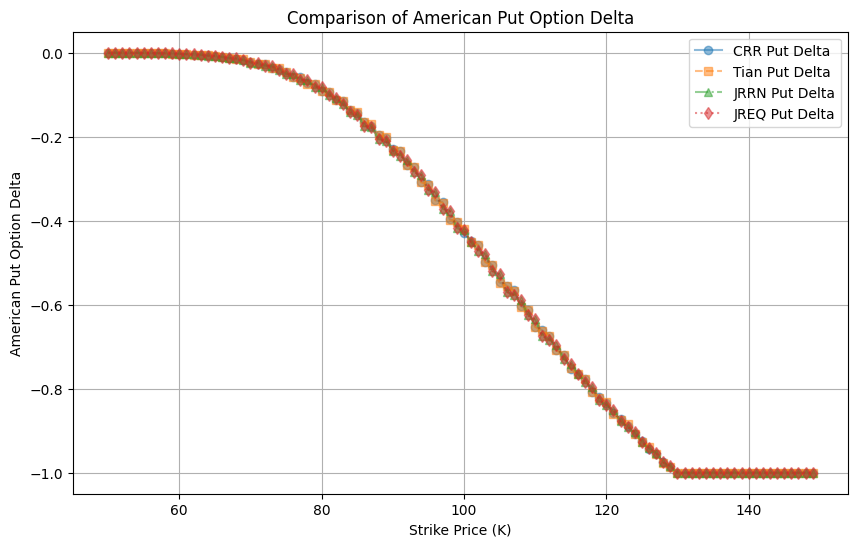

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrDeltaAPut, label='CRR Put Delta', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianDeltaAPut, label='Tian Put Delta', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnDeltaAPut, label='JRRN Put Delta', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqDeltaAPut, label='JREQ Put Delta', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Delta')
plt.title('Comparison of American Put Option Delta')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3bc">3bc.</a>  <font color = "green"> American Options Gamma </font>  [back to table of contents](#top)

In [28]:
crrGammaACall, crrGammaAPut = [], []
tianGammaACall, tianGammaAPut = [], []
jrrnGammaACall, jrrnGammaAPut = [], []
jreqGammaACall, jreqGammaAPut = [], []

for k in ks:
    crrGammaACall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, crrCalib, AmericanOption(T, k, PayoffType.Call))))
    
    crrGammaAPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Gamma, crrCalib, AmericanOption(T, k, PayoffType.Put)))) 
       
    tianGammaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Gamma, tianCalib, AmericanOption(T, k, PayoffType.Call))))
    
    tianGammaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, tianCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jrrnGammaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Gamma, jrrnCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jrrnGammaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, jrrnCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jreqGammaACall.append(binomialGreeks(S, 
                                         r, 
                                         vol, 
                                         T, 
                                         k, 
                                         GreekType(n, Greeks.Gamma, jreqCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jreqGammaAPut.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Gamma, jreqCalib, AmericanOption(T, k, PayoffType.Put))))


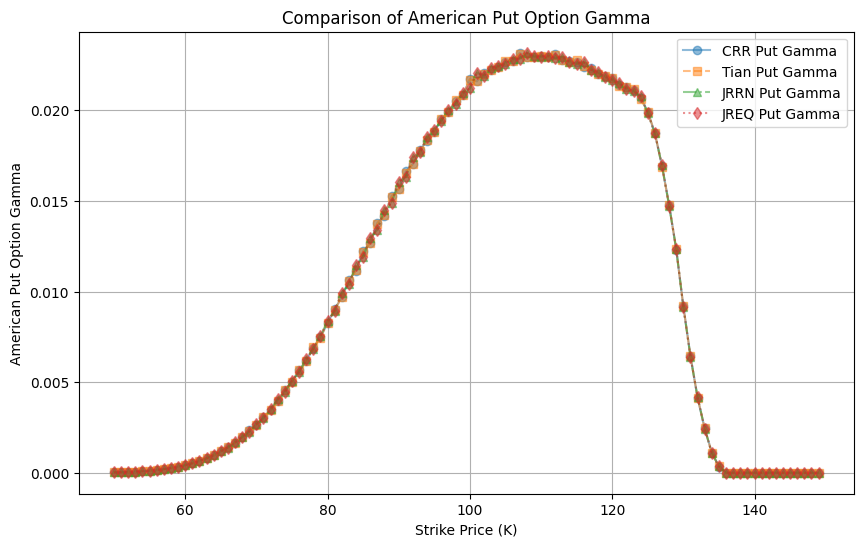

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrGammaAPut, label='CRR Put Gamma', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianGammaAPut, label='Tian Put Gamma', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnGammaAPut, label='JRRN Put Gamma', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqGammaAPut, label='JREQ Put Gamma', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Gamma')
plt.title('Comparison of American Put Option Gamma')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3bd">3bd.</a>  <font color = "green"> American Options Vega </font>  [back to table of contents](#top)

In [30]:
crrVegaACall, crrVegaAPut = [], []
tianVegaACall, tianVegaAPut = [], []
jrrnVegaACall, jrrnVegaAPut = [], []
jreqVegaACall, jreqVegaAPut = [], []

for k in ks:
    crrVegaACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, crrCalib, AmericanOption(T, k, PayoffType.Call))))
    
    crrVegaAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Vega, crrCalib, AmericanOption(T, k, PayoffType.Put))))   
     
    tianVegaACall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Vega, tianCalib, AmericanOption(T, k, PayoffType.Call))))
    
    tianVegaAPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, tianCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jrrnVegaACall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Vega, jrrnCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jrrnVegaAPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, jrrnCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jreqVegaACall.append(binomialGreeks(S, 
                                        r, 
                                        vol, 
                                        T, 
                                        k, 
                                        GreekType(n, Greeks.Vega, jreqCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jreqVegaAPut.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Vega, jreqCalib, AmericanOption(T, k, PayoffType.Put))))

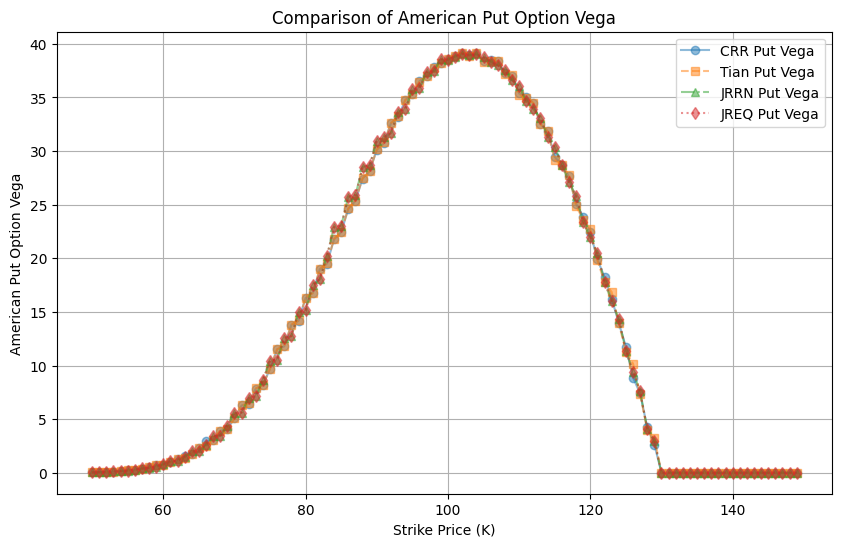

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrVegaAPut, label='CRR Put Vega', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianVegaAPut, label='Tian Put Vega', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnVegaAPut, label='JRRN Put Vega', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqVegaAPut, label='JREQ Put Vega', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Vega')
plt.title('Comparison of American Put Option Vega')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3be">3be.</a>  <font color = "green"> American Options Theta </font>  [back to table of contents](#top)

In [32]:
crrThetaACall, crrThetaAPut = [], []
tianThetaACall, tianThetaAPut = [], []
jrrnThetaACall, jrrnThetaAPut = [], []
jreqThetaACall, jreqThetaAPut = [], []

for k in ks:
    crrThetaACall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, crrCalib, AmericanOption(T, k, PayoffType.Call))))
    
    crrThetaAPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Theta, crrCalib, AmericanOption(T, k, PayoffType.Put))))  
      
    tianThetaACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, tianCalib, AmericanOption(T, k, PayoffType.Call))))
    
    tianThetaAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, tianCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jrrnThetaACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, jrrnCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jrrnThetaAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, jrrnCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jreqThetaACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Theta, jreqCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jreqThetaAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Theta, jreqCalib, AmericanOption(T, k, PayoffType.Put))))

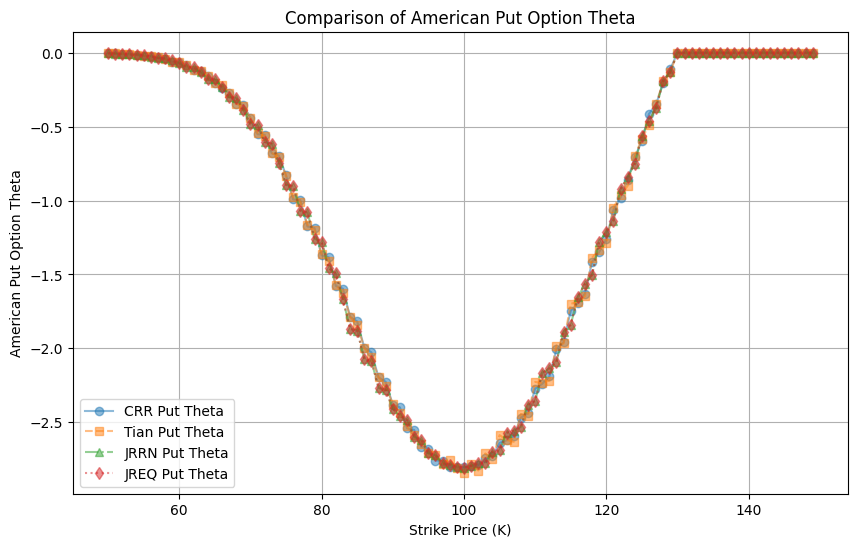

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrThetaAPut, label='CRR Put Theta', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianThetaAPut, label='Tian Put Theta', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnThetaAPut, label='JRRN Put Theta', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqThetaAPut, label='JREQ Put Theta', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Theta')
plt.title('Comparison of American Put Option Theta')
plt.legend()
plt.grid(True)

plt.show()

<a id = "p3bf">3bf.</a>  <font color = "green"> American Options Rho </font>  [back to table of contents](#top)

In [34]:
crrRhoACall, crrRhoAPut = [], []
tianRhoACall, tianRhoAPut = [], []
jrrnRhoACall, jrrnRhoAPut = [], []
jreqRhoACall, jreqRhoAPut = [], []

for k in ks:
    crrRhoACall.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, crrCalib, AmericanOption(T, k, PayoffType.Call))))
    
    crrRhoAPut.append(binomialGreeks(S, 
                                     r, 
                                     vol, 
                                     T, 
                                     k, 
                                     GreekType(n, Greeks.Rho, crrCalib, AmericanOption(T, k, PayoffType.Put))))   
     
    tianRhoACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Rho, tianCalib, AmericanOption(T, k, PayoffType.Call))))
    
    tianRhoAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, tianCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jrrnRhoACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Rho, jrrnCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jrrnRhoAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, jrrnCalib, AmericanOption(T, k, PayoffType.Put))))
    
    jreqRhoACall.append(binomialGreeks(S, 
                                       r, 
                                       vol, 
                                       T, 
                                       k, 
                                       GreekType(n, Greeks.Rho, jreqCalib, AmericanOption(T, k, PayoffType.Call))))
    
    jreqRhoAPut.append(binomialGreeks(S, 
                                      r, 
                                      vol, 
                                      T, 
                                      k, 
                                      GreekType(n, Greeks.Rho, jreqCalib, AmericanOption(T, k, PayoffType.Put))))

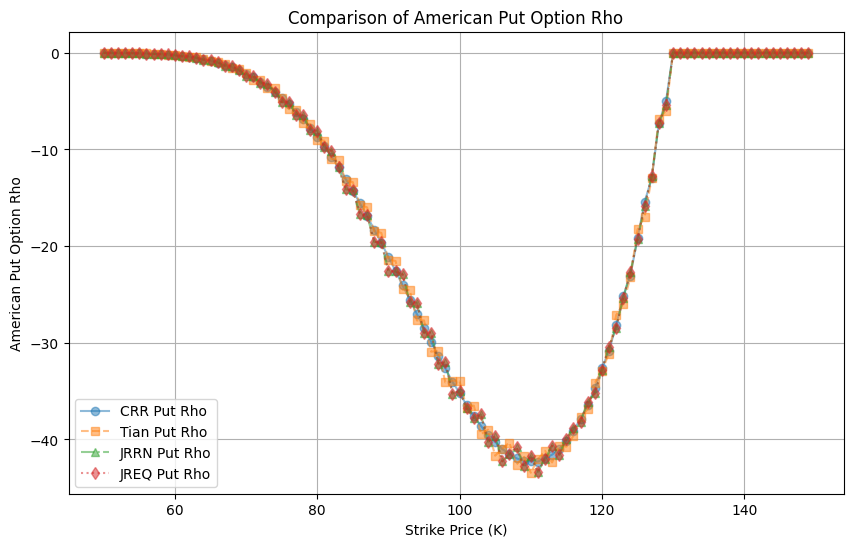

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(ks, crrRhoAPut, label='CRR Put Rho', marker='o', linestyle='-', alpha=0.5)
plt.plot(ks, tianRhoAPut, label='Tian Put Rho', marker='s', linestyle='--', alpha=0.5)
plt.plot(ks, jrrnRhoAPut, label='JRRN Put Rho', marker='^', linestyle='-.', alpha=0.5)
plt.plot(ks, jreqRhoAPut, label='JREQ Put Rho', marker='d', linestyle=':', alpha=0.5)

plt.xlabel('Strike Price (K)')
plt.ylabel('American Put Option Rho')
plt.title('Comparison of American Put Option Rho')
plt.legend()
plt.grid(True)

plt.show()